In [ ]:
# Download images
!curl -O -L -C - https://github.com/YannSia/challenge-2022/raw/master/workshop-data/images.zip
!unzip images.zip
!rm images.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   154  100   154    0     0    276      0 --:--:-- --:--:-- --:--:--   275
100 4033k  100 4033k    0     0  5905k      0 --:--:-- --:--:-- --:--:-- 5905k
Archive:  images.zip
   creating: images/
  inflating: images/n02091032_Italian_greyhound.JPEG  
  inflating: images/n02894605_breakwater.JPEG  
  inflating: images/n02930766_cab.JPEG  
  inflating: images/n01682714_American_chameleon.JPEG  
  inflating: images/n02607072_anemone_fish.JPEG  
  inflating: images/n02797295_barrow.JPEG  
  inflating: images/n01843383_toucan.JPEG  
  inflating: images/n02939185_caldron.JPEG  
  inflating: images/n02917067_bullet_train.JPEG  
  inflating: images/n03063689_coffeepot.JPEG  
  inflating: images/n02951585_can_opener.JPEG  
  inflating: images/n04596742_wok.JPEG  
  inflating: images/n02971356_carton.JPEG  
  inflating: images/n01494475

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Load samples images from the ImageNet dataset

In [ ]:
images = tf.data.Dataset \
    .list_files("./images/*.JPEG", shuffle=False) \
    .map(lambda p: tf.io.read_file(p)) \
    .map(lambda c: tf.io.decode_jpeg(c))

#images = list(images.as_numpy_iterator())
print(f"Loaded {len(images)} images!")

Loaded 30 images!


Let's see some of them!

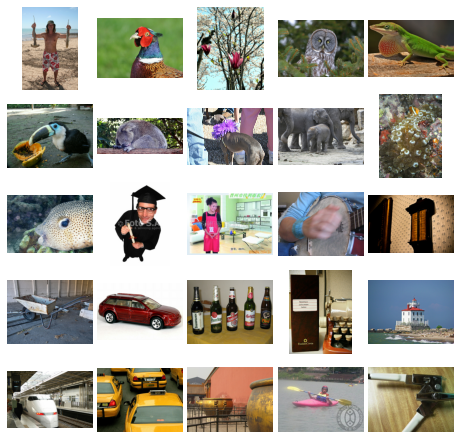

In [ ]:
imgs_per_side = 5

def plot_images(images):
    # New figure of size 8x8
    plt.figure(figsize=(8, 8))
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    
    # Iterate through the first imgs_per_size ^ 2 images and display them
    for i, img in images.take(imgs_per_side ** 2).enumerate().as_numpy_iterator():
        plt.subplot(imgs_per_side, imgs_per_side, i + 1)
        plt.imshow(img.astype("uint8"))
        plt.axis("off")

    plt.show()

plot_images(images)

## Keras preprocessing layers

### Image preprocessing

#### Resizing

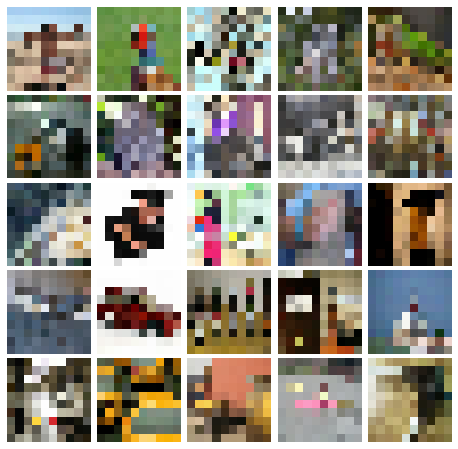

In [ ]:
plot_images(
    images.map(keras.layers.Resizing(10, 10))
)

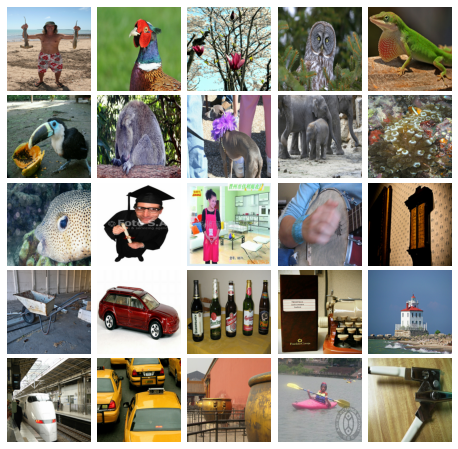

In [ ]:
# We are going to resize everything to 400x400 for the rest of the notebook
images = images.map(keras.layers.Resizing(400, 400))

plot_images(images)

#### Rescaling

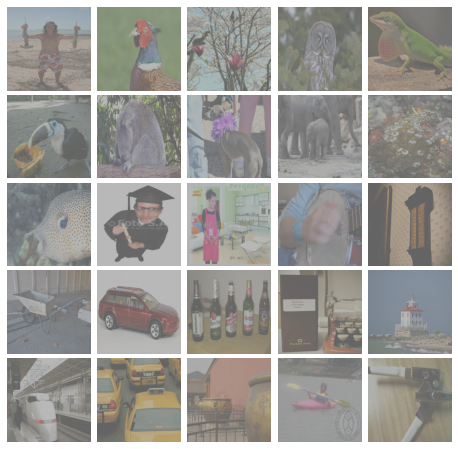

In [ ]:
plot_images(
    images.map(keras.layers.Rescaling(scale=1./3, offset=100))
)

# Rescale images to [0, 1]
keras.layers.Rescaling(scale=1./255)

# Rescale images to [-1, 1]
keras.layers.Rescaling(scale=1./127.5, offset=-1)

#### CenterCrop

In [ ]:
plot_images(
    images.map(keras.layers.CenterCrop(150, 150))
)

### Normalization

The layer holds an internal mean & variance, which we must either provide or compute:

In [ ]:
normalization = keras.layers.Normalization(axis=None)

# Compute the mean and variance on the input dataset
normalization.adapt(images)
print(f"The layer computed a mean of {normalization.mean} and a variance of {normalization.variance}!")

# We can alternatively specify the mean and the variance at initialization
# as computing them every time may be slow
normalization = keras.layers.Normalization(mean=114.142746, variance=5135.5444, axis=None)

In [ ]:
plot_images(
    images.map(normalization)
)

### Image augmentation

#### RandomCrop

In [ ]:
plot_images(
    images.map(keras.layers.RandomCrop(150, 150))
)

#### RandomFlip

In [ ]:
plot_images(
    images.map(keras.layers.RandomFlip(mode="horizontal_and_vertical"))
)

#### RandomTranslation

In [ ]:
plot_images(images.map(
    keras.layers.RandomTranslation(
        height_factor=(-0.2, 0.2),
        width_factor=(-0.4, 0.4),
        fill_mode="constant" # can be one of {"constant", "reflect", "wrap", "nearest"}
    )
))

#### RandomRotation

In [ ]:
plot_images(
    # Random rotation in range [-0.5 * 2pi, 0.5 * 2pi]
    images.map(keras.layers.RandomRotation((-0.5, 0.5))) # fill_mode can be specified here too
)

#### RandomZoom

In [ ]:
plot_images(
    images.map(keras.layers.RandomZoom(
        height_factor=(-0.3, 0.5),
        width_factor=None,
        fill_mode="constant"
    ))
)

#### RandomWidth and RandomHeight

In [ ]:
print("RandomWidth:")
plot_images(
    images.map(keras.layers.RandomWidth((-0.6, 0)))
)

print("RandomHeight:")
plot_images(
    images.map(keras.layers.RandomHeight((-0.6, 0)))
)

#### RandomContrast

Instead of specifying a tuple, you can pass a float; this works for most layers: see each layer's documentation to see how it is handled!

In [ ]:
plot_images(
    images.map(keras.layers.RandomContrast(0.8))
    # Equivalent to
    #images.map(keras.layers.RandomContrast((0.2, 1.8)))
)

## Let's combine some layers together!

In [ ]:
custom_preprocessing = keras.Sequential([
    keras.layers.RandomRotation(0.25),
    keras.layers.CenterCrop(300, 300),
    keras.layers.RandomFlip(mode="horizontal"),
    keras.layers.RandomContrast(0.4),
])

plot_images(
    images.map(custom_preprocessing)
)